### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [1]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 

2023-02-16 10:39:36.714056: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-16 10:39:51.246338: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-16 10:39:51.581787: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-16 10:39:52.050441: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2023-02-16 10:39:52.050474: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-16 10:39:52.729297: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-02-16

### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

#### **<span style="color:green">Answer:</span>**
\[The first value corresponds to number of images.
The second and third value correspond to picture resolution, therefore, the second and third values are numbers of rows and columns in a picture (pixels). 
The last value corresponds to the color channels or RGB colors (the values are between 0 to 255 if we use `X_test.min()` and `X_test.max()`).\]

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

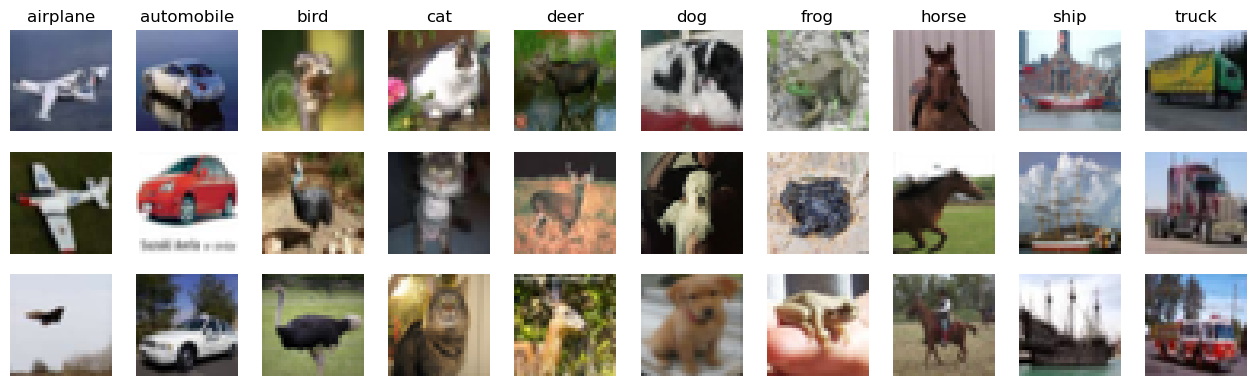

In [3]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [4]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

In [5]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

#Overfits around 45% accuracy
#x = Dense(1024, activation='relu')(x)

x = Dense(512, activation='tanh')(x)
x = Dense(256, activation='tanh')(x)
x = Dense(128, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)

2023-02-16 10:40:26.497890: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 10:40:26.498810: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-16 10:40:26.499694: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2023-02-16 10:40:26.499727: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-02-16 10:40:26.499769: I tensorflow/stream_executor/platform/default/dso_loa

Model: "model"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_1 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
flatten (Flatten)                            (None, 3072)                            0              
____________________________________________________________________________________________________
dense (Dense)                                (None, 512)                             1573376        
____________________________________________________________________________________________________
dense_1 (Dense)                              (None, 256)                             131328         
____________________________________________________________________________

##### **Training the model**
In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

In [6]:
history = model.fit(X_train,y_train_c, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

2023-02-16 10:40:43.913935: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-16 10:40:43.946099: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2596990000 Hz


Epoch 1/15


2023-02-16 10:40:45.172653: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1250/1250 [==============================] - 11s 4ms/step - loss: 1.9452 - accuracy: 0.2956 - val_loss: 1.6872 - val_accuracy: 0.4019
Epoch 2/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6464 - accuracy: 0.4079 - val_loss: 1.6082 - val_accuracy: 0.4205
Epoch 3/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5546 - accuracy: 0.4411 - val_loss: 1.5881 - val_accuracy: 0.4343
Epoch 4/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5155 - accuracy: 0.4571 - val_loss: 1.5182 - val_accuracy: 0.4634
Epoch 5/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4722 - accuracy: 0.4761 - val_loss: 1.5386 - val_accuracy: 0.4528
Epoch 6/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4422 - accuracy: 0.4817 - val_loss: 1.6110 - val_accuracy: 0.4357
Epoch 7/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4229 - accuracy: 0.4876 - val_loss: 1.5021 - val_accuracy: 0.4676
Ep

##### **Evaluating the model**
We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [7]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.465
Test accuracy = 0.485


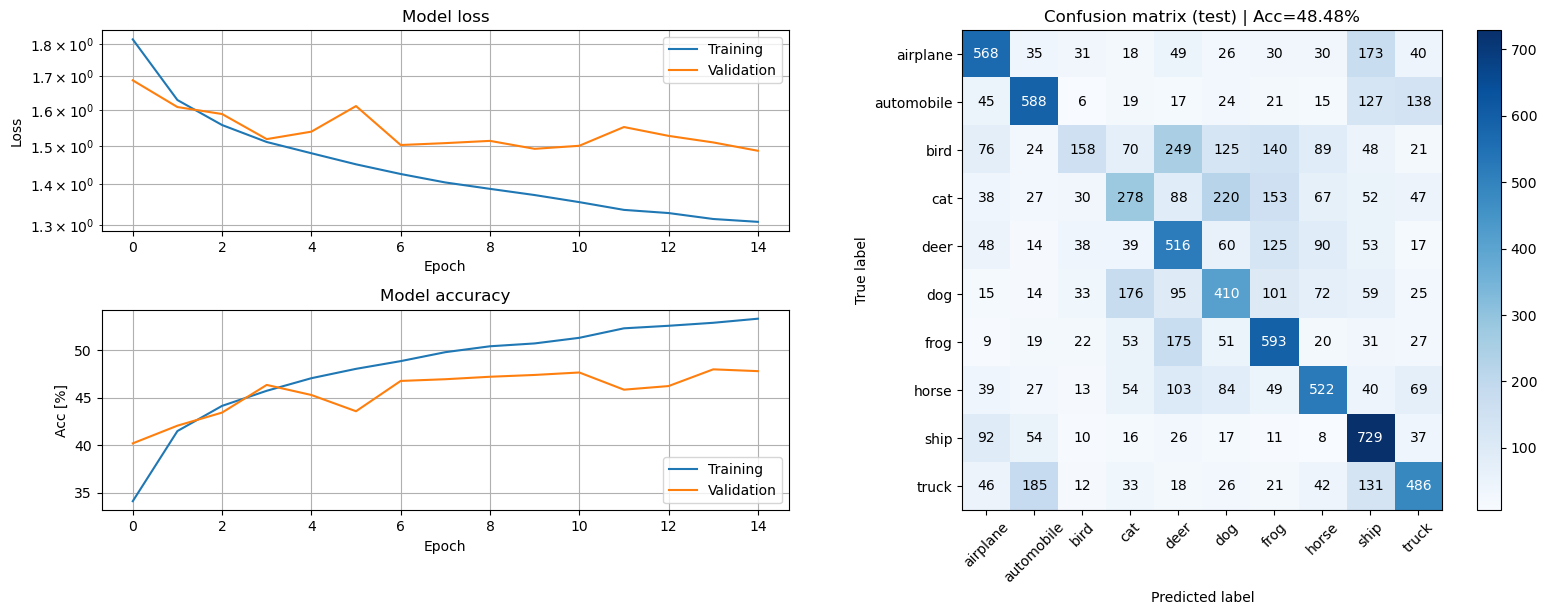

In [8]:
from Custom import PlotModelEval

# Custom function for evaluating the model and plotting training history
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
\[For the first dense layers, we have used relu as activation function. Altough, we have tried the tanh as activation function but the difference was around 1% less. Given that the tanh has some problems such as the vanishing gradient. Which ensures that the weights are updated correctly.

We started with 1 dense layer of 1024 units and realised that it overfits and the accuracy peaks at around 45%. Thereafter, we increased the number of dense layers with fewer units (512, 256, 128) as this is known to learn more complex features. Which resulted in higher accuracy.

For the last layer, we need 10 nodes due to 10 number of classes. We have also used softmax to get the results as normalized probability.\]

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

#### **<span style="color:green">Answer:</span>**
\[For the dataset of MNIST handwritten digits, there are a lot of similarities for each class. It is easier to run neural networks as the dataset has fewer features. There are more parameters (32x32x3) for each image as compared to the MNIST dataset. The dataset has 3 color channels, in addition pictures has different angles (How would the neural networks identify difference between an aircraft and a bird if it is far or in a different angle). Detecting a corresponding pattern for each class can be therefore difficult and compute intensive task.\]

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x = Conv2D(32, activation="relu", kernel_size=(3,3), padding="same")(x_in)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, activation="relu", kernel_size=(3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)
# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_1"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_2 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d (Conv2D)                              (None, 32, 32, 32)                      896            
____________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)                 (None, 16, 16, 32)                      0              
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                            (None, 16, 16, 32)                      9248           
__________________________________________________________________________

##### **Training the CNN**

In [10]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15


2023-02-16 10:41:58.886480: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-02-16 10:42:12.730871: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-02-16 10:42:12.750266: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1250/1250 [==============================] - 22s 5ms/step - loss: 1.7884 - accuracy: 0.3521 - val_loss: 1.2519 - val_accuracy: 0.5637
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1852 - accuracy: 0.5842 - val_loss: 1.0908 - val_accuracy: 0.6241
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0424 - accuracy: 0.6365 - val_loss: 1.0749 - val_accuracy: 0.6293
Epoch 4/15
1250/1250 [==============================] - 4s 4ms/step - loss: 0.9748 - accuracy: 0.6603 - val_loss: 1.0204 - val_accuracy: 0.6529
Epoch 5/15
1250/1250 [==============================] - 4s 4ms/step - loss: 0.8843 - accuracy: 0.6864 - val_loss: 1.0199 - val_accuracy: 0.6480
Epoch 6/15
1250/1250 [==============================] - 4s 4ms/step - loss: 0.8437 - accuracy: 0.7060 - val_loss: 1.0642 - val_accuracy: 0.6384
Epoch 7/15
1250/1250 [==============================] - 4s 4ms/step - loss: 0.8119 - accuracy: 0.7195 - val_loss: 1.0566 - val_accuracy: 0.6395
Ep

##### **Evaluating the CNN**

In [11]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.037
Test accuracy = 0.667


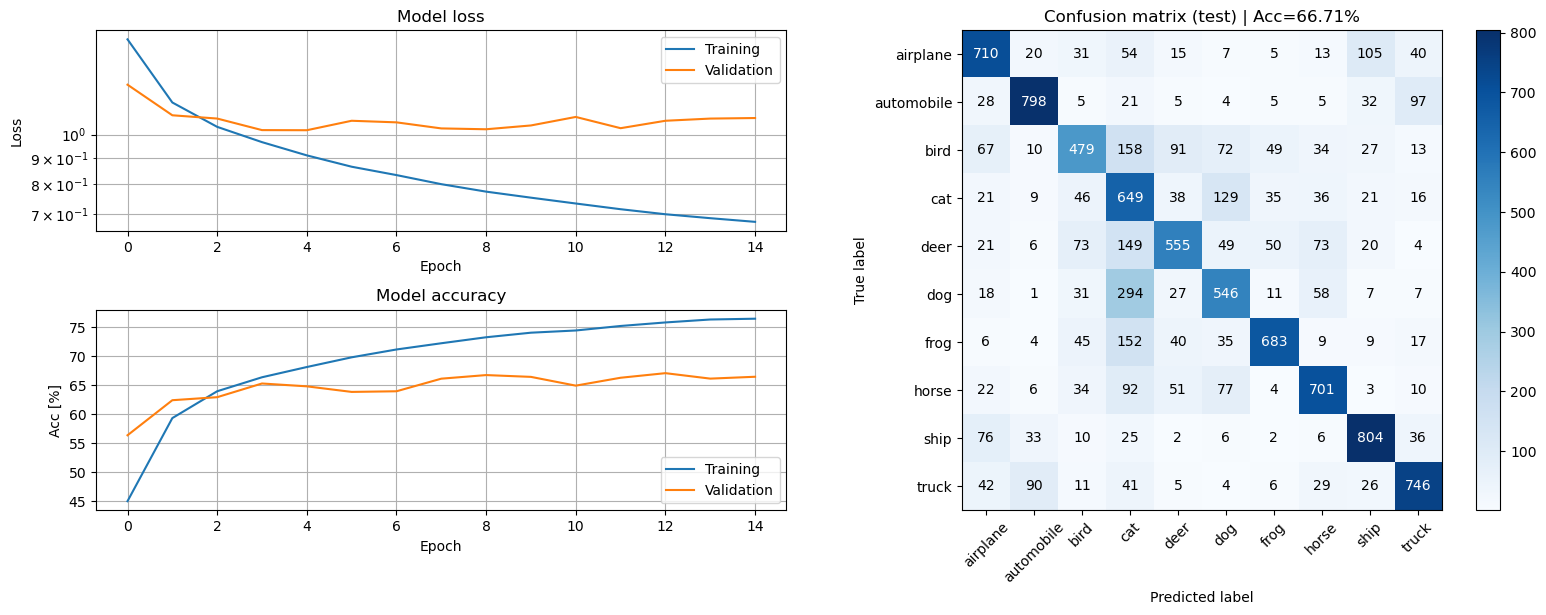

In [12]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
\[In the convulational neural network we have used padding = same to keep the keep the same resolution of the picture. Which helps the kenrel to easily process the image. However, if this parameter was set valid, we run the risk of the image getting smaller and the edges ignored.
We have used kernel size of 3x3 to more efficiently find the patterns of the images which seemed to be a effective for the dimensions of these pictures. We chose the filter to 32 as it is large enough and compatible with the 3x3 kernel size. We have tried smaller filter, however, the accuracy was smaller than 50%. 

For the pooling we have used 2x2 because we want to ensure that it does not overfit for the given data and adequate enough to keep the dimensions.

We have used two convolutional layers, where the first one tries to find a detailed pattern and then the pooling take the highest values and resize the input. The second layer tries to find a more complex pattern or feature from the first layer which is later pooled.
Lastly we flatten it and use dense layer with softmax and 10 nodes to classify the objects.  
\]

#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

#### **<span style="color:green">Answer:</span>**
\[The convolutional layer is better at finding pattern in the pictures if they are not the same (different angles/rotation/position). As each subsequent convolutional layer is focused on a specific pattern. Meanwhile, the dense neural network is focusing on the all pixels in the pictures. The dense layer is therefore more effective when the pictures does not have different angle or positions for corresponding class.

To compare these neural networks, the dense layer computes all of the features, meanwhile the convolutional layer focuses on the part of the picture. This requires the dense layer to be a computational intensive task.
\]

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after the pooling layers in the convolution part of the model, or after activations in the fully connected part of the model.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the Dropout layer and test the new performance.

In [13]:
from tensorflow.keras.layers import Dropout

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x = Conv2D(32, activation="relu", kernel_size=(3,3), padding="same")(x_in)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, activation="relu", kernel_size=(3,3), padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)
# ============================================

model = Model(inputs=x_in, outputs=x)

# Compile model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_2"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_3 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                            (None, 32, 32, 32)                      896            
____________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)               (None, 16, 16, 32)                      0              
____________________________________________________________________________________________________
conv2d_3 (Conv2D)                            (None, 16, 16, 32)                      9248           
__________________________________________________________________________

In [14]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8532 - accuracy: 0.3266 - val_loss: 1.3236 - val_accuracy: 0.5323
Epoch 2/15
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2835 - accuracy: 0.5417 - val_loss: 1.1332 - val_accuracy: 0.6027
Epoch 3/15
1250/1250 [==============================] - 4s 4ms/step - loss: 1.1302 - accuracy: 0.6037 - val_loss: 1.0552 - val_accuracy: 0.6334
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0541 - accuracy: 0.6282 - val_loss: 0.9938 - val_accuracy: 0.6595
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9895 - accuracy: 0.6523 - val_loss: 1.0234 - val_accuracy: 0.6482
Epoch 6/15
1250/1250 [==============================] - 4s 4ms/step - loss: 0.9528 - accuracy: 0.6691 - val_loss: 0.9755 - val_accuracy: 0.6598
Epoch 7/15
1250/1250 [==============================] - 4s 4ms/step - loss: 0.9137 - accuracy: 0.6803 - val_loss: 0.9410 - val_accuracy:

In [15]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.934
Test accuracy = 0.691


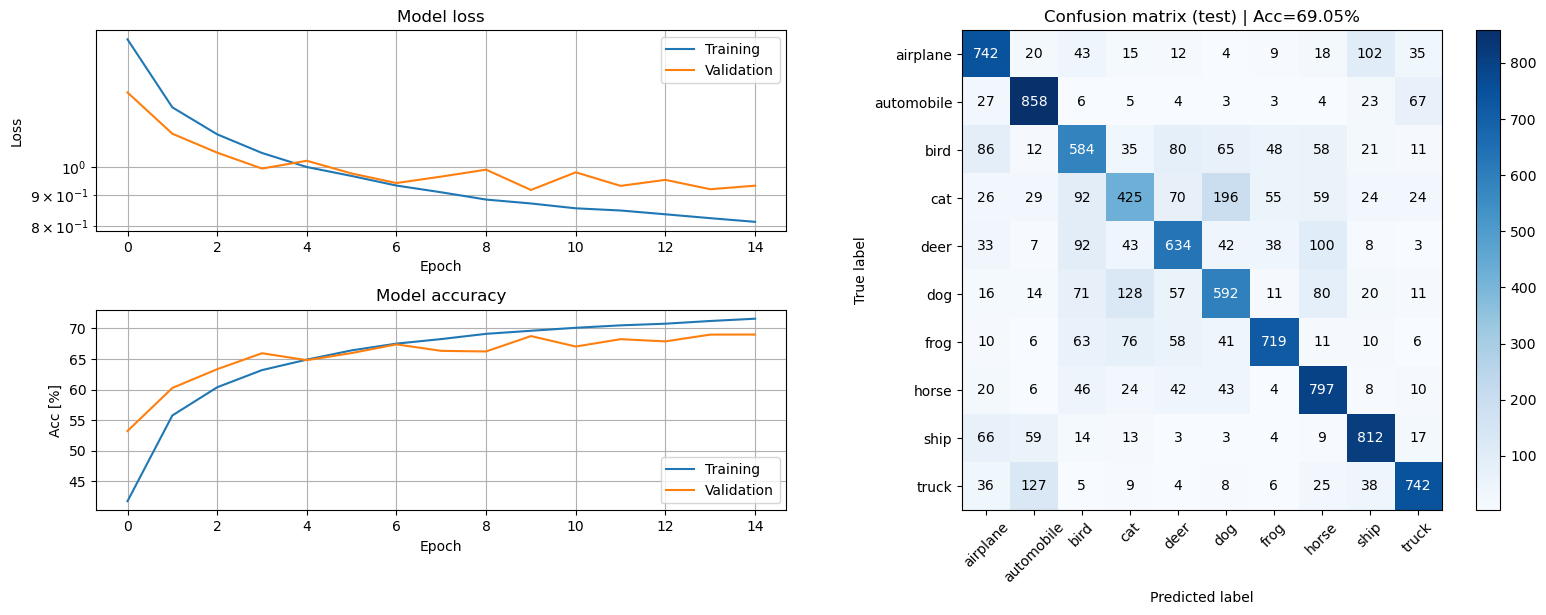

In [16]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 6:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

Hint: what does the dropout layer do at test time?

#### **<span style="color:green">Answer:</span>**
\[
It is important to mention that by running the same code again without seed these results may differ. This is the case that we did comparison on.

**Normal Model**

- Test accuracy: 0.670

- Validation accuracy at iteration: 0.6614

- Training accuracy at iteration: 0.7141

**Dropout Model**

- Test accuracy: 0.685

- Validation accuracy at last iteration: 0.6870

- Training accuracy at iteration: 0.7183

As it can be seen by comparison of these two results, both test and valdiation improved. Meanwhile the training accuracy is similar.
By comparing the graphs (Model loss and model accuracy after PlotModelEval()) for corresponding models it can be concluded that normal model overfited (the test does not improve after around 4 or 6 epochs) and the "Droupout" helped with preventing or delaying overfiting. 
\]

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

In [17]:
from tensorflow.keras.layers import BatchNormalization, Activation

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Conv2D(32, activation="relu", kernel_size=(3,3), padding="same")(x_in)
x = BatchNormalization(momentum = 0.75)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, activation="relu", kernel_size=(3), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_3"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_4 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_4 (Conv2D)                            (None, 32, 32, 32)                      896            
____________________________________________________________________________________________________
batch_normalization (BatchNormalization)     (None, 32, 32, 32)                      128            
____________________________________________________________________________________________________
activation (Activation)                      (None, 32, 32, 32)                      0              
__________________________________________________________________________

In [18]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 6s 4ms/step - loss: 2.0066 - accuracy: 0.3814 - val_loss: 1.3859 - val_accuracy: 0.5166
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2654 - accuracy: 0.5554 - val_loss: 1.1957 - val_accuracy: 0.5850
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1227 - accuracy: 0.6061 - val_loss: 1.1250 - val_accuracy: 0.6121
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0410 - accuracy: 0.6366 - val_loss: 1.1146 - val_accuracy: 0.6125
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9806 - accuracy: 0.6602 - val_loss: 1.1254 - val_accuracy: 0.6154
Epoch 6/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9147 - accuracy: 0.6825 - val_loss: 1.0269 - val_accuracy: 0.6572
Epoch 7/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8863 - accuracy: 0.6951 - val_loss: 0.9895 - val_accuracy:

In [19]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.022
Test accuracy = 0.665


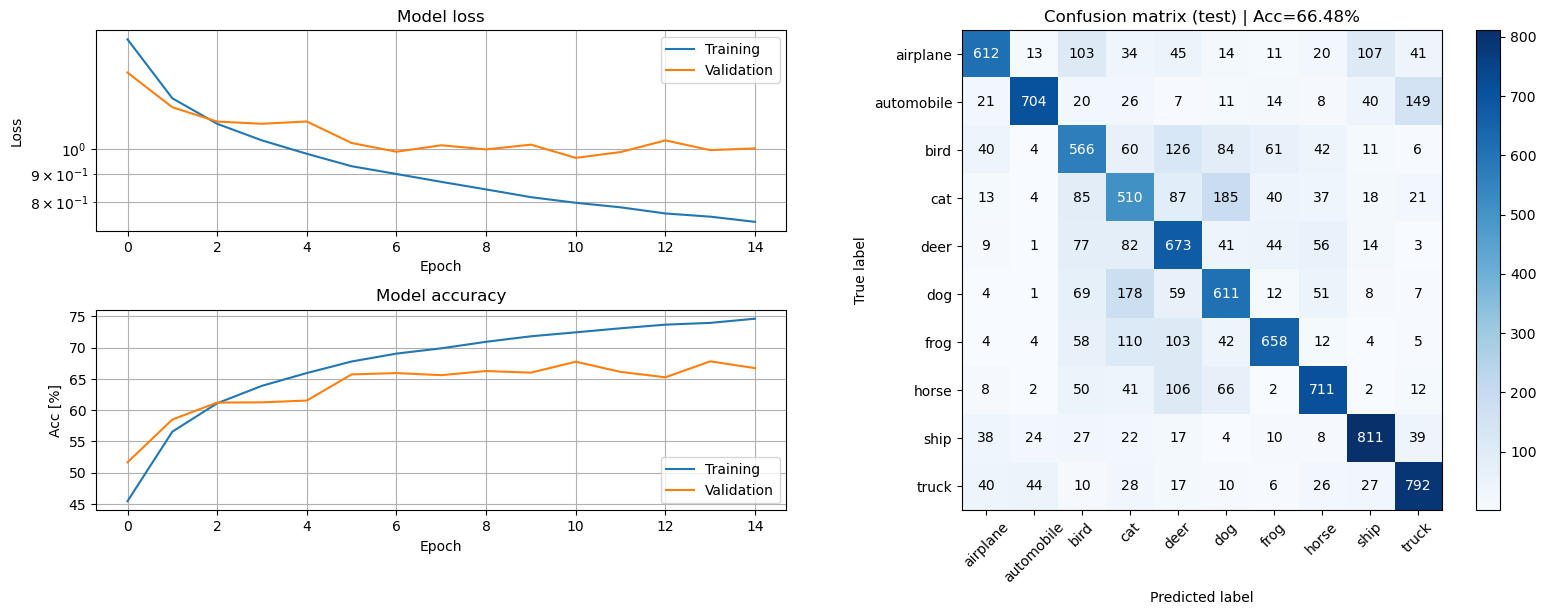

In [20]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 7:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if:

1. The minibatch size is too small.
2. The minibatch size is too large.

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

#### **<span style="color:green">Answer:</span>**
\[With a small minibatch size, the statistical estimates used in BatchNorm become less accurate and can result in noisy gradients that hinder the convergence of the network. In addition, a small batch size can increase the variability of the activations and reduce the regularization effect of BatchNorm, leading to overfitting. This is particularly relevant for smaller datasets, where the variance of the estimates can be high even with a moderate batch size. Therefore, it is recommended to use a batch size that is large enough to capture the statistical properties of the data, but not so large that it exceeds the memory capacity of the hardware or slows down the training process.

If the minibatch size is too large, the normalization can become less effective and lead to a reduction in performance, especially if the inputs are highly variable or the network has many layers. This is because the normalization is based on the statistics of the current batch, and a large batch size can make these statistics less representative of the overall distribution of the data. Moreover, a large batch size can increase the computational and memory requirements of the training process, which may limit the scalability and efficiency of the network. Therefore, it is recommended to use a batch size that is large enough to reduce the noise in the gradient estimates, but not so large that it compromises the normalization or the performance.

**References**

Ioffe, S., & Szegedy, C. (2015). Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift. ArXiv, abs/1502.03167. https://arxiv.org/pdf/1502.03167.pdf 
\]

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

Model: "model_4"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_5 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_6 (Conv2D)                            (None, 32, 32, 512)                     14336          
____________________________________________________________________________________________________
batch_normalization_2 (BatchNormalization)   (None, 32, 32, 512)                     2048           
____________________________________________________________________________________________________
activation_2 (Activation)                    (None, 32, 32, 512)                     0              
__________________________________________________________________________

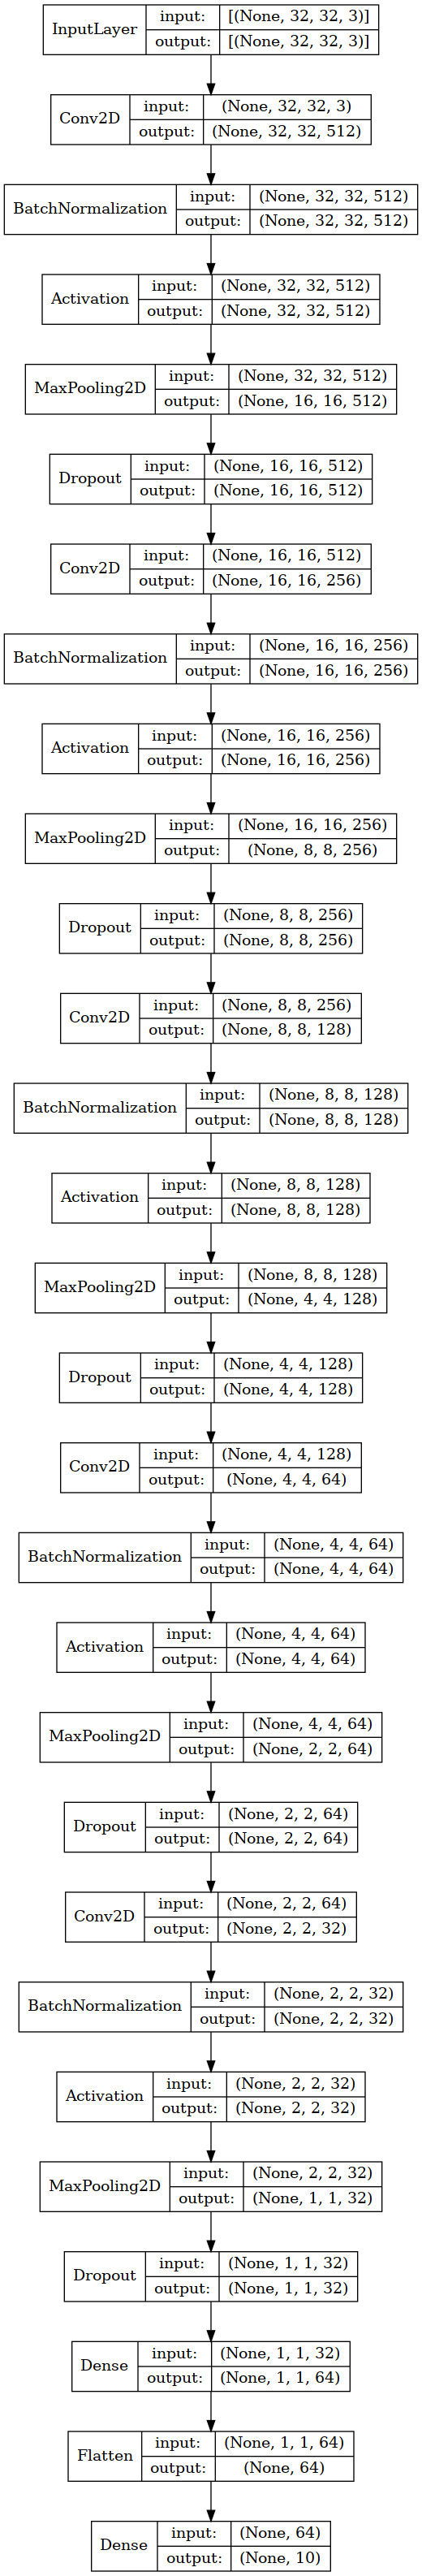

In [21]:
from tensorflow.keras.utils import plot_model

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Conv2D(512, activation="relu", kernel_size=(3,3), padding="same")(x_in)
x = BatchNormalization(momentum = 0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(256, activation="relu", kernel_size=(3,3), padding="same")(x)
x = BatchNormalization(momentum = 0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, activation="relu", kernel_size=(3,3), padding="same")(x)
x = BatchNormalization(momentum = 0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, activation="relu", kernel_size=(3,3), padding="same")(x)
x = BatchNormalization(momentum = 0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(32, activation="relu", kernel_size=(3,3), padding="same")(x)
x = BatchNormalization(momentum = 0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [22]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 56s 41ms/step - loss: 2.1007 - accuracy: 0.2253 - val_loss: 1.5342 - val_accuracy: 0.4235
Epoch 2/25
1250/1250 [==============================] - 49s 39ms/step - loss: 1.6329 - accuracy: 0.3863 - val_loss: 1.3982 - val_accuracy: 0.4835
Epoch 3/25
1250/1250 [==============================] - 49s 39ms/step - loss: 1.4847 - accuracy: 0.4461 - val_loss: 1.3255 - val_accuracy: 0.5101
Epoch 4/25
1250/1250 [==============================] - 49s 39ms/step - loss: 1.3736 - accuracy: 0.4930 - val_loss: 1.1804 - val_accuracy: 0.5914
Epoch 5/25
1250/1250 [==============================] - 49s 39ms/step - loss: 1.3046 - accuracy: 0.5244 - val_loss: 1.1187 - val_accuracy: 0.6111
Epoch 6/25
1250/1250 [==============================] - 49s 39ms/step - loss: 1.2335 - accuracy: 0.5587 - val_loss: 1.0944 - val_accuracy: 0.6286
Epoch 7/25
1250/1250 [==============================] - 49s 39ms/step - loss: 1.1714 - accuracy: 0.5868 - val_loss: 0.9762 -

In [26]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.811
Test accuracy = 0.757


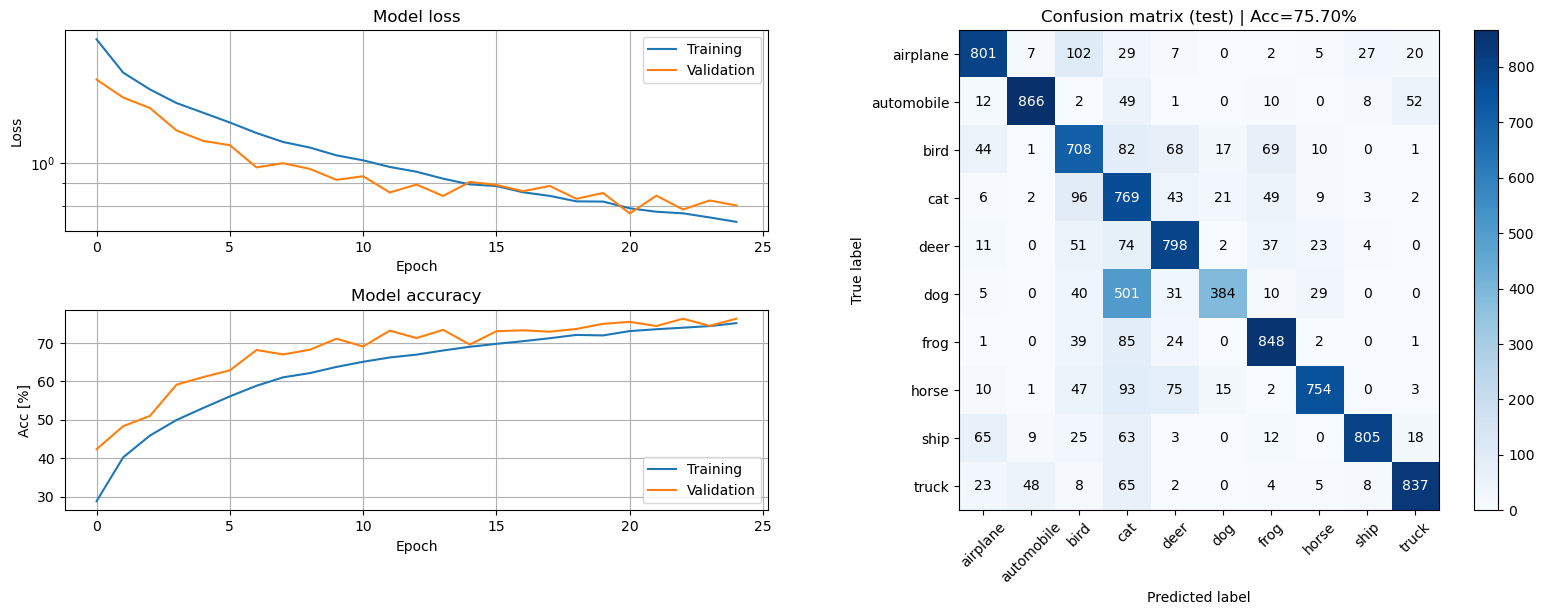

In [24]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 8:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Explain your model architecture and motivate the design choices you have made.

#### **<span style="color:green">Answer:</span>**
\[The architecture followed in this implementation was based on the article titled "ImageNet Classification with Deep Convolutional Neural Networks" by Krizhevsky, Sutskever, and Hinton (2012). Based on other studies, the kernel size which was used in AlexNet artictle which was 11x11 was ineffective and time consuming when training. Therefore, we went for 3x3 kernel size as suggested by Pandey (2020).

After running we realized that we did not get to 75% accuracy and made some own changes.
We then experimented with the batch normalization momentum, different kernel sizes, number of layers and pool size according to our knowledge from the earlier question.


**References**

Krizhevsky, A., Sutskever, I. & Hinton, G. E. (2012). ImageNet Classification with Deep Convolutional Neural Networks. In F. Pereira, C. J. C. Burges, L. Bottou & K. Q. Weinberger (ed.), Advances in Neural Information Processing Systems 25 (pp. 1097--1105) . Curran Associates, Inc. .
    \]

---

### **Want some extra challenge?**
For those of you that want to get creative, here are some things to look into. But note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [25]:

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x_in = Input(shape=X_train.shape[1:])

x = ???

model = Model(inputs=x_in, outputs=x)

# You can also change this if you want
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# Print the summary and model image
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

# ============================================


SyntaxError: invalid syntax (4245498712.py, line 7)

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)